In [236]:
# ======================================================================
# 2.8. Итоговое задание
# ======================================================================

# Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, 
# чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
# Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

# Датасет - stud_math.csv

# ======================================================================
# 1. Импортируем необходимые библиотеки
# ======================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

# ======================================================================
# 2. Выполним первичный осмотр данных
# ======================================================================

# Установим настроечные пар-ры датасета
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

# Загрузим датасет и посмотрим на него
df_stud = pd.read_csv('stud_math.csv')
df_stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [237]:
# ======================================================================
# В датасете представлены следующие данные:

# school — аббревиатура школы, в которой учится ученик
# sex — пол ученика ('F' - женский, 'M' - мужской)
# age — возраст ученика (от 15 до 22)
# address — тип адреса ученика ('U' - городской, 'R' - за городом)
# famsize — размер семьи('LE3' <= 3, 'GT3' >3)

# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
# Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)

# schoolsup — дополнительная образовательная поддержка (yes или no)
# famsup — семейная образовательная поддержка (yes или no)
# paid — дополнительные платные занятия по математике (yes или no)
# activities — дополнительные внеучебные занятия (yes или no)
# nursery — посещал детский сад (yes или no)

# higher — хочет получить высшее образование (yes или no)
# internet — наличие интернета дома (yes или no)
# romantic — в романтических отношениях (yes или no)
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# absences — количество пропущенных занятий
# score — баллы по госэкзамену по математике
# ======================================================================

# Посмотрим на основные характеристики датасета
df_stud.info()

# ======================================================================
# Краткие выводы №1:
# В датасете содержится 13 числовых и 17 строковых столбцов
# в столбцах school, sex и age - не имеется пропусков; в остальных столбцах - пропуски имеются
# ======================================================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

In [238]:
# ======================================================================
# 3. Выполним первичный анализ и преобразование данных в столбцах
# ======================================================================

# Преобразуем столбцы с ответами 'yes/no' в числовые: 0 - воздержался от ответа; 1 - no; 2 - yes
# Для этого напишем специальную функцию преобзования значений
def preobrazovanie_yes_no(name_column, text_print):
    # преобразуем символьные данные в числовые коды
    df_stud[name_column] = df_stud[name_column].apply(lambda x: int(x.replace('no', '1')) if x == 'no'
                                                     else int(x.replace('yes', '2')) if x == 'yes' else int(0))
    # напечатаем получившееся распределение
    print('Распределение ' + str(text_print))
    display(df_stud[name_column].value_counts())
    return print('=' * 80)
# ======================================================================

In [239]:
preobrazovanie_yes_no('schoolsup', 'дополнительной образовательной поддержки:')
preobrazovanie_yes_no('famsup', 'семейной образовательной поддержки:')
preobrazovanie_yes_no('paid', 'дополнительных платных занятий:')
preobrazovanie_yes_no('activities', 'дополнительных внеучебных занятий:')
preobrazovanie_yes_no('nursery', 'вариантов посещения детского сада:')
preobrazovanie_yes_no('higher', 'вариантов желания получать высшее образование:')
preobrazovanie_yes_no('internet', 'наличия дома интернета:')
preobrazovanie_yes_no('romantic', 'наличия романтических отношений:')

Распределение дополнительной образовательной поддержки:


1    335
2     51
0      9
Name: schoolsup, dtype: int64

Распределение семейной образовательной поддержки:


2    219
1    137
0     39
Name: famsup, dtype: int64

Распределение дополнительных платных занятий:


1    200
2    155
0     40
Name: paid, dtype: int64

Распределение дополнительных внеучебных занятий:


2    195
1    186
0     14
Name: activities, dtype: int64

Распределение вариантов посещения детского сада:


2    300
1     79
0     16
Name: nursery, dtype: int64

Распределение вариантов желания получать высшее образование:


2    356
0     20
1     19
Name: higher, dtype: int64

Распределение наличия дома интернета:


2    305
1     56
0     34
Name: internet, dtype: int64

Распределение наличия романтических отношений:


1    240
2    124
0     31
Name: romantic, dtype: int64

In [240]:
# Преобразуем столбцы с бинарными (текстовыми) ответами в числовые: 0 - воздержался от ответа; 1 - no; 2 - yes
# Для этого напишем специальную функцию преобзования значений
def preobrazovanie_val_binary(name_column, val_1, val_2, text_print):
    # преобразуем символьные данные в числовые коды
    df_stud[name_column] = df_stud[name_column].apply(lambda x: int(x.replace(str(val_2), '1')) if x == val_2
                                                     else int(x.replace(str(val_1), '2')) if x == val_1 else int(0))
    # напечатаем получившееся распределение
    print('Распределение ' + str(text_print))
    display(df_stud[name_column].value_counts())
    return print('=' * 80)
# ======================================================================

In [241]:
preobrazovanie_val_binary('school', 'GP', 'MS', 'аббревиатур школ:')
preobrazovanie_val_binary('sex', 'M', 'F', 'учащихся по полу:')
preobrazovanie_val_binary('address', 'U', 'R', 'типов адресов учащихся:')
preobrazovanie_val_binary('famsize', 'LE3', 'GT3', 'типов семей по их размеру:')
preobrazovanie_val_binary('Pstatus', 'T', 'A', 'статусов совместного жилья родителей:')

Распределение аббревиатур школ:


2    349
1     46
Name: school, dtype: int64

Распределение учащихся по полу:


1    208
2    187
Name: sex, dtype: int64

Распределение типов адресов учащихся:


2    295
1     83
0     17
Name: address, dtype: int64

Распределение типов семей по их размеру:


1    261
2    107
0     27
Name: famsize, dtype: int64

Распределение статусов совместного жилья родителей:


2    314
0     45
1     36
Name: Pstatus, dtype: int64

In [242]:
# Посмотрим на распределения в числовых столбцах
# Напишем для этого сразу компактную функцию
def print_numeric_priznak(name_column, text_print):
    print('Распределение ' + str(text_print))
    display(df_stud[name_column].value_counts())
    display(df_stud[name_column].hist())
    display(df_stud[name_column].describe())
    print("Пропущенных значений в столбце " + str(name_column) + ":", df_stud[name_column].isnull().sum())
    print('=' * 80)

Распределение учащихся по возрасту


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Пропущенных значений в столбце age: 0


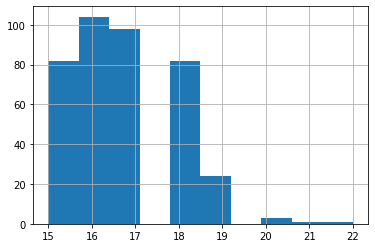

In [243]:
print_numeric_priznak('age', 'учащихся по возрасту')
# print("Пропущенных значений в столбце 'age':", df_stud['age'].isnull().sum())

# Как мы видим из полученного распределения, приблизительно 95% учащихся находится в возрасте от 15 до 19 лет
# Остальные данные - либо ошибочные выбросы, либо есть несколько человек от 20 до 22 лет

Распределение образования матерей


4.0    134
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

count    395.000000
mean       2.759494
std        1.099321
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Пропущенных значений в столбце Medu: 0


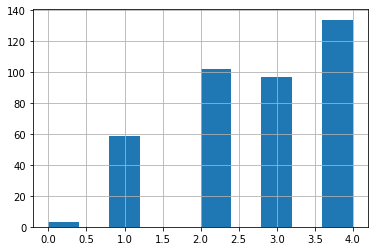

In [244]:
# Как мы видили ранее, у нас больше всего матерей с высшим образованием, поэтому принято решение
# 3-м пропущенным значениям присвоить код 4
df_stud['Medu'] = df_stud['Medu'].apply(lambda x: x if (x >= 0 and x <= 4) else int(4))
print_numeric_priznak('Medu', 'образования матерей')

Распределение образования отцов


2.0    130
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

Пропущенных значений в столбце Fedu: 0


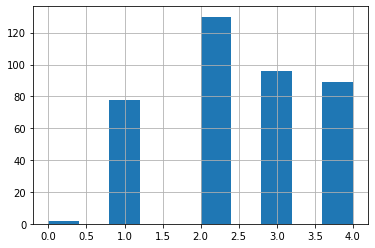

In [245]:
# В данных Fedu представлено 4 статуса образования отца, пропущенных 24 значения и 1 явная ошибка - число 40
# Как мы видили ранее, у нас больше всего отцов с неполным средним образованием, 
# и в данных закралась 1 ошибка, к-ую мы сразу исправим, а пропускам присвоим код 2
df_stud['Fedu'] = df_stud['Fedu'].apply(lambda x: int(4) if x == 40 else x if (x >= 0 and x <= 4) else int(2))

print_numeric_priznak('Fedu', 'образования отцов')

Распределение времени в пути до школы:


1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Пропущенных значений в столбце traveltime: 0


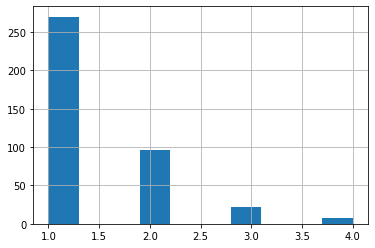

In [246]:
# В столбце traveltime представлено 4 группы кодов, за к-ые учащиеся добираются до школы,
# поскольку в данных содержится 28 пропусков, а наиболее вероятный код 1, то принято решение пропускам присвоить данный код
df_stud['traveltime'] = df_stud['traveltime'].apply(lambda x: x if (x >= 1 and x <= 4) else int(1))

print_numeric_priznak('traveltime', 'времени в пути до школы:')

Распределение времени на учёбу помимо школы в неделю:


2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Пропущенных значений в столбце studytime: 0


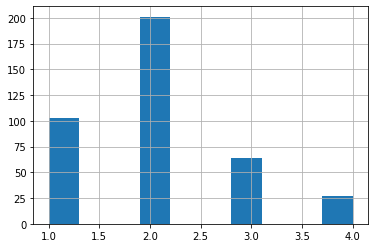

In [247]:
# В столбце studytime представлено 4 группы кодов времени, к-ые учащиеся тратят на учёбу в неделю помимо времени на занятия,
# поскольку в данных содержится 7 пропусков, а наиболее вероятный код 2, то принято решение пропускам присвоить данный код
df_stud['studytime'] = df_stud['studytime'].apply(lambda x: x if (x >= 1 and x <= 4) else int(2))

print_numeric_priznak('studytime', 'времени на учёбу помимо школы в неделю:')

Распределение количества внеучебных неудач:


0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Пропущенных значений в столбце failures: 0


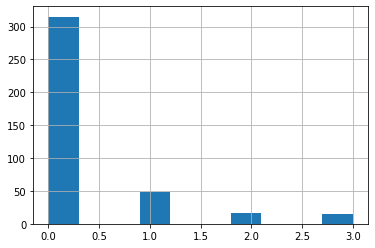

In [248]:
# В столбце failures представлено 4 группы кодов кол-ва неудач, 
# поскольку в данных содержится 22 пропусков, а наиболее вероятный код 0, то принято решение пропускам присвоить данный код
df_stud['failures'] = df_stud['failures'].apply(lambda x: x if (x >= 0 and x <= 3) else int(0))

print_numeric_priznak('failures', 'количества внеучебных неудач:')

Распределение оценок семейных отношений:


4.0    209
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

Пропущенных значений в столбце famrel: 0


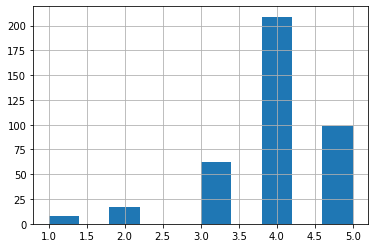

In [249]:
# В столбце famrel представлено 5 градаций оценок семейных отношений, к-ые указали учащиеся,
# поскольку в данных содержится 1 явная ошибка и 27 пропусков, а наиболее вероятная оценка 4, то принято решение пропускам присвоить данную оценку
df_stud['famrel'] = df_stud['famrel'].apply(lambda x: int(1) if x == -1 else x if (x >= 1 and x <= 5) else int(4))

print_numeric_priznak('famrel', 'оценок семейных отношений:')

Распределение оценок свободного времени:


3.0    164
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Пропущенных значений в столбце freetime: 0


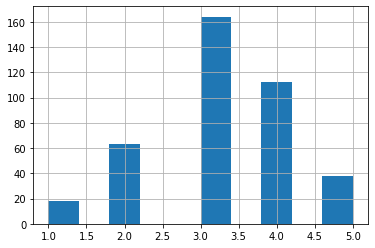

In [250]:
# В столбце freetime представлено 5 градаций оценок свободного времени, к-ые указали учащиеся,
# поскольку в данных содержится 11 пропусков, а наиболее вероятная оценка 3, то принято решение пропускам присвоить данную оценку
df_stud['freetime'] = df_stud['freetime'].apply(lambda x: x if (x >= 1 and x <= 5) else int(3))

print_numeric_priznak('freetime', 'оценок свободного времени:')

Распределение оценок проведения времени с друзьями:


3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Пропущенных значений в столбце goout: 0


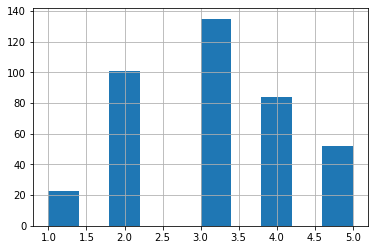

In [251]:
# В столбце goout представлено 5 градаций оценок проведения времени с друзьями, к-ые указали учащиеся,
# поскольку в данных содержится 8 пропусков, а наиболее вероятная оценка 3, то принято решение пропускам присвоить данную оценку
df_stud['goout'] = df_stud['goout'].apply(lambda x: x if (x >= 1 and x <= 5) else int(3))

print_numeric_priznak('goout', 'оценок проведения времени с друзьями:')

Распределение оценок текущего состояния здоровья:


5.0    153
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

count    395.000000
mean       3.587342
std        1.397729
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Пропущенных значений в столбце health: 0


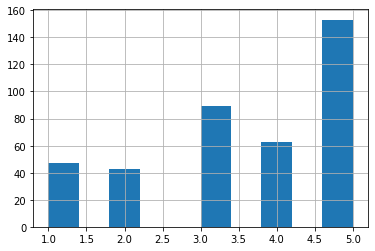

In [252]:
# В столбце health представлено 5 градаций оценок текущего состояния здоровья, к-ые указали учащиеся,
# поскольку в данных содержится 15 пропусков, а наиболее вероятная оценка 5, то принято решение пропускам присвоить данную оценку
df_stud['health'] = df_stud['health'].apply(lambda x: x if (x >= 1 and x <= 5) else int(5))

print_numeric_priznak('health', 'оценок текущего состояния здоровья:')

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


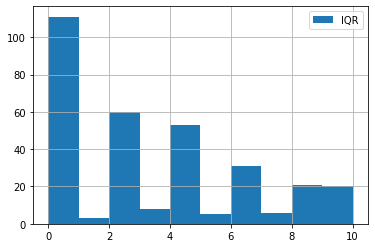

In [253]:
# Проверим столбец absences на наличие выбросов
median = df_stud.absences.median()
perc_25 = df_stud.absences.quantile(0.25)
perc_75 = df_stud.absences.quantile(0.75)
IQR = perc_75 - perc_25

print('25-й перцентиль: {},'.format(perc_25), '75-й перцентиль: {},'.format(perc_75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f = perc_25 - 1.5 * IQR, l = perc_75 + 1.5 * IQR))

df_stud.absences.loc[df_stud.absences.between(perc_25 - 1.5 * IQR, perc_75 + 1.5 * IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend()

Распределение кол-ва пропущенных занятий:


0    186
1    124
2     57
3     19
4      9
Name: absences, dtype: int64

count    395.000000
mean       0.837975
std        0.994439
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: absences, dtype: float64

Пропущенных значений в столбце absences: 0


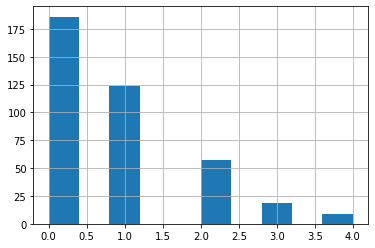

In [254]:
# В столбце absences представлено распределение кол-ва пропущенных занятий, к-ые указали учащиеся,
# в данных явно заметны выбросы, поэтому принято решение, не выбрасывать данные, но ввести 5 бальную градацию кол-ва пропусков
# 0 - 0 - 2 пропусков; 1 - > 2 и <= 8; 2 - > 8 и <= 16; 3 - > 16 и <= 26; 4 - > 26
# поскольку в данных содержится 12 пропусков, а наиболее вероятное кол-во равно оценке 0, то принято решение пропускам присвоить данную оценку
df_stud['absences'] = df_stud['absences'].apply(lambda x: int(0) if (x >= 0 and x <= 2)
                                                else int(1) if (x > 2 and x <= 8) 
                                                else int(2) if (x > 8 and x <= 16)
                                                else int(3) if (x > 16 and x <= 26)
                                                else int(4) if (x > 26)
                                                else int(0))

print_numeric_priznak('absences', 'кол-ва пропущенных занятий:')

Распределение оценок по математике:


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Пропущенных значений в столбце score: 6


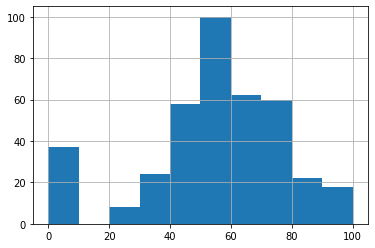

In [255]:
# Взглянем на распределение оценок по математике
print_numeric_priznak('score', 'оценок по математике:')

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


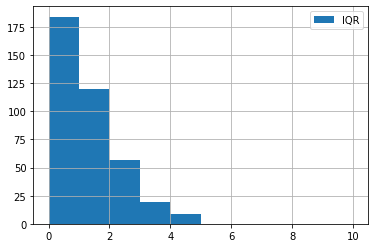

In [256]:
# Проверим столбец score на наличие выбросов
median = df_stud.score.median()
perc_25 = df_stud.score.quantile(0.25)
perc_75 = df_stud.score.quantile(0.75)
IQR = perc_75 - perc_25

print('25-й перцентиль: {},'.format(perc_25), '75-й перцентиль: {},'.format(perc_75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f = perc_25 - 1.5 * IQR, l = perc_75 + 1.5 * IQR))

df_stud.absences.loc[df_stud.score.between(perc_25 - 1.5 * IQR, perc_75 + 1.5 * IQR)].hist(bins = 10, range = (0, 10), 
                                                                                             label = 'IQR')
plt.legend()

In [257]:
# воспользуемся корреляционным анализом для подтверждения того, что столбцы "studytime" и "studytime, granular" обратно скоррелированы
# и можно с уверенностью удалить один из столбцов
df_stud.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
school,1.000000,0.012286,-0.377610,0.281753,-0.067688,-0.102607,0.136125,0.084498,-0.235860,0.092290,-0.068841,0.145050,0.058673,-0.007499,0.084920,0.134599,-0.092700,0.035167,0.032450,-0.056690,0.032196,-0.037352,0.005542,0.050984,0.052025,0.044524
sex,0.012286,1.000000,-0.028606,-0.015043,0.038315,0.020145,0.083011,0.024390,0.050730,-0.304775,0.030405,-0.133653,-0.039618,-0.098664,0.074598,-0.004295,0.307566,-0.181119,-0.026848,-0.139999,0.046215,0.232259,0.085441,0.142264,-0.044422,0.099285
age,-0.377610,-0.028606,1.000000,-0.141083,0.012018,0.008104,-0.160777,-0.154781,0.084755,-0.015355,0.228081,-0.239681,-0.105109,0.009123,-0.031692,-0.129643,0.015556,-0.066201,-0.065962,0.161705,0.065250,0.026443,0.134069,-0.060506,0.205128,-0.155726
address,0.281753,-0.015043,-0.141083,1.000000,0.023031,-0.072169,0.084382,0.104948,-0.194893,-0.036696,-0.120126,0.005480,-0.025744,0.015051,-0.019713,0.123815,0.036626,-0.014409,0.046990,0.004394,-0.038655,-0.022089,-0.016303,-0.057746,0.047170,0.067663
famsize,-0.067688,0.038315,0.012018,0.023031,1.000000,-0.017240,-0.028541,-0.008241,0.009526,-0.044706,0.009466,-0.018624,-0.024002,-0.067358,-0.079257,0.073900,0.045456,0.038317,-0.058728,-0.030630,-0.019935,-0.014319,0.057554,-0.036488,0.023161,0.066200
Pstatus,-0.102607,0.020145,0.008104,-0.072169,-0.017240,1.000000,-0.032156,-0.074229,-0.048401,0.026336,0.048093,-0.046580,-0.014681,-0.067155,0.038535,-0.010040,-0.026351,0.064960,-0.003380,0.063187,0.027443,0.075122,0.000270,0.000014,-0.108569,-0.040159
Medu,0.136125,0.083011,-0.160777,0.084382,-0.028541,-0.032156,1.000000,0.587159,-0.164282,0.073607,-0.243821,-0.005527,0.121918,0.078098,0.091967,0.179012,-0.074156,0.071468,0.119186,0.001458,-0.013366,0.029204,0.062412,-0.066406,0.108208,0.200890
Fedu,0.084498,0.024390,-0.154781,0.104948,-0.008241,-0.074229,0.587159,1.000000,-0.120629,0.007754,-0.260690,0.041903,0.187701,0.026497,0.076112,0.134340,-0.007778,0.133219,0.027878,0.011488,-0.024077,-0.029868,0.039084,-0.009862,0.031493,0.124829
traveltime,-0.235860,0.050730,0.084755,-0.194893,0.009526,-0.048401,-0.164282,-0.120629,1.000000,-0.094637,0.049670,0.028706,-0.080418,-0.034315,-0.005123,-0.047449,0.095724,-0.109086,-0.038759,0.064962,-0.019040,-0.012496,0.051775,-0.044325,-0.026008,-0.056535
studytime,0.092290,-0.304775,-0.015355,-0.036696,-0.044706,0.026336,0.073607,0.007754,-0.094637,1.000000,-0.166598,0.076184,0.119062,0.211996,0.113586,0.046899,-1.000000,0.122300,0.135193,0.049541,0.037638,-0.119014,-0.051090,-0.064860,-0.059847,0.114295


In [258]:
# Поскольку столбец 'studytime, granular' обратно коррелирует со столбцом 'studytime', его можно сразу удалить
df_stud = df_stud.drop(['studytime, granular'], axis = 1)

# Поскольку в столбце целевой переменной score всего 6 пропусков, эти строки можно также просто удалить
# df_stud_mod = df_stud_mod.dropna()
# df_stud_mod.info()

Распределение видов работ матерей:


4    152
2     98
3     58
0     55
1     32
Name: Mjob, dtype: int64

count    395.000000
mean       2.556962
std        1.420899
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Mjob, dtype: float64

Пропущенных значений в столбце Mjob: 0


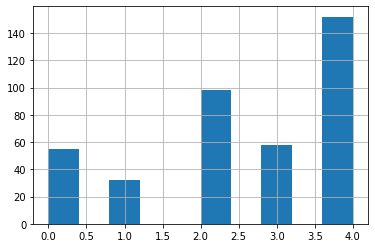

In [259]:
# ======================================================================
# 4. Выполним анализ номинативных переменных
# ======================================================================

# В данных Mjob представлено 5 видов работ матерей, пропущенных 19 значений. Пропускам присвоим код - other

# Преобразуем символьные данные в поле 'Mjob' в числовой тип
df_stud['Mjob'] = df_stud['Mjob'].apply(lambda x: int(x.replace('teacher', '0')) if x == 'teacher' 
                                        else int(x.replace('health', '1')) if x == 'health'
                                        else int(x.replace('services', '2')) if x == 'services'
                                        else int(x.replace('at_home', '3')) if x == 'at_home'
                                        else int(x.replace('other', '4')) if x == 'other' else int(4))

# Взглянем на распределение Mjob
print_numeric_priznak('Mjob', 'видов работ матерей:')

Распределение видов работ отцов:


4    233
2    102
0     29
3     16
1     15
Name: Fjob, dtype: int64

count    395.000000
mean       3.035443
std        1.289851
min        0.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        4.000000
Name: Fjob, dtype: float64

Пропущенных значений в столбце Fjob: 0


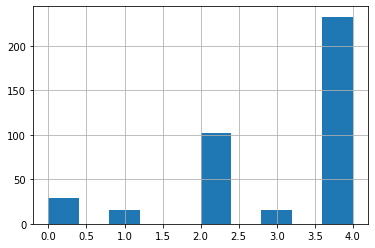

In [260]:
# В данных Fjob представлено 5 видов работ отцов, пропущенных 36 значений. Пропускам присвоим код - other

# Преобразуем символьные данные в поле 'Mjob' в числовой тип
df_stud['Fjob'] = df_stud['Fjob'].apply(lambda x: int(x.replace('teacher', '0')) if x == 'teacher' 
                                        else int(x.replace('health', '1')) if x == 'health'
                                        else int(x.replace('services', '2')) if x == 'services'
                                        else int(x.replace('at_home', '3')) if x == 'at_home'
                                        else int(x.replace('other', '4')) if x == 'other' else int(4))

# Взглянем на распределение Fjob
print_numeric_priznak('Fjob', 'видов работ отцов:')

Распределение причин выбора школы:


2    154
0    104
1    103
3     34
Name: reason, dtype: int64

count    395.000000
mean       1.298734
std        0.954218
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: reason, dtype: float64

Пропущенных значений в столбце reason: 0


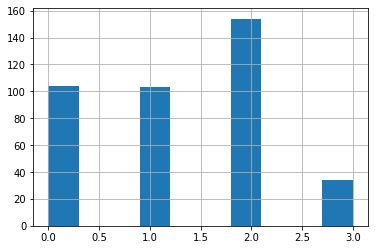

In [261]:
# В данных reason представлено 4 вида причин, пропущенных 17 значений. Пропускам присвоим код - cource

# Преобразуем символьные данные в поле 'reason' в числовой тип
df_stud['reason'] = df_stud['reason'].apply(lambda x: int(x.replace('home', '0')) if x == 'home' 
                                            else int(x.replace('reputation', '1')) if x == 'reputation'
                                            else int(x.replace('course', '2')) if x == 'course'
                                            else int(x.replace('other', '3')) if x == 'other' else int(2))

# Взглянем на распределение reason
print_numeric_priznak('reason', 'причин выбора школы:')

Распределение видов опекунов:


0    281
1     86
2     28
Name: guardian, dtype: int64

count    395.000000
mean       0.359494
std        0.610716
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: guardian, dtype: float64

Пропущенных значений в столбце guardian: 0


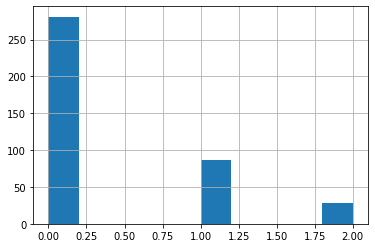

In [262]:
# В данных guardian представлено 3 вида опекунов, пропущенных 31 значений. Пропускам присвоим код - mother

# Преобразуем символьные данные в поле 'guardian' в числовой тип
df_stud['guardian'] = df_stud['guardian'].apply(lambda x: int(x.replace('mother', '0')) if x == 'mother' 
                                            else int(x.replace('father', '1')) if x == 'father'
                                            else int(x.replace('other', '2')) if x == 'other' else int(0))

# Взглянем на распределение guardian
print_numeric_priznak('guardian', 'видов опекунов:')

In [263]:
# Поскольку в столбце целевой переменной score всего 6 пропусков, эти строки можно также просто удалить
df_stud_mod = df_stud.dropna()
df_stud_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
school        389 non-null int64
sex           389 non-null int64
age           389 non-null int64
address       389 non-null int64
famsize       389 non-null int64
Pstatus       389 non-null int64
Medu          389 non-null float64
Fedu          389 non-null float64
Mjob          389 non-null int64
Fjob          389 non-null int64
reason        389 non-null int64
guardian      389 non-null int64
traveltime    389 non-null float64
studytime     389 non-null float64
failures      389 non-null float64
schoolsup     389 non-null int64
famsup        389 non-null int64
paid          389 non-null int64
activities    389 non-null int64
nursery       389 non-null int64
higher        389 non-null int64
internet      389 non-null int64
romantic      389 non-null int64
famrel        389 non-null float64
freetime      389 non-null float64
goout         389 non-null float64
health        389 non

In [267]:
# ======================================================================
# 5. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
# Проверим нулевую гипотезу о том, что распределения математических оценок по различным параметрам неразличимы:
# ======================================================================
def get_stat_dif(column):
    cols = df_stud.loc[:, column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df_stud_mod.loc[df_stud_mod.loc[:, column] == comb[0], 'score'], 
                        df_stud_mod.loc[df_stud_mod.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

# for col in ['Mjob', 'Fjob', 'reason', 'guardian']:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 
            'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
           'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [ ]:
# ======================================================================
# 6. Заключение
# ======================================================================

# В результате работы мы получили датасет размером 29 столбцов на 389 строк, пропуски отсутствуют.
# Для оценки 'важности' признаков на целевую переменную score использовали t-test и основанный на нём p-value для 
# тестирования нулевой гипотезы.
# В итоге значимыми осталось лишь 5 категориальных признаков (столбцов, колонок) - Medu, Mjob, failures, higher и romantic.